In [41]:
# [1] Import inicial
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt

In [42]:
# [2] Carregar dados da sessão
fastf1.plotting.setup_mpl()  # Aplica o estilo visual da F1
session = fastf1.get_session(2023, 'Brazil', 'R')
session.load()  # Carrega os dados

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req  

In [43]:
# [3] Escolha dois pilotos e uma volta de referência
driver1 = 'VER'  # Verstappen
driver2 = 'HAM'  # Hamilton
lap_num = 1  # Número da volta a ser analisada

In [44]:
# [4] Obtém os dados dos pilotos
lap_driver1 = session.laps.pick_drivers(driver1).pick_laps(lap_num).iloc[0]
lap_driver2 = session.laps.pick_drivers(driver2).pick_lap(lap_num).iloc[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:3021: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


In [45]:
# [5] Telemetria
telemetry_ver = lap_driver1.get_telemetry()
telemetry_ham = lap_driver2.get_telemetry()

In [46]:
telemetry_ver

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-11-05 17:03:22.842,0 days 01:02:22.839000,,0.5300,0 days 00:00:00,9950.099977,0.0,1,16.00,True,1,interpolation,-0.002370,-5.666405e-07,OnTrack,-3587.001064,-5616.992459,7777.000297
3,2023-11-05 17:03:22.880,0 days 01:02:22.877000,,0.5300,0 days 00:00:00.038000,9957.066667,0.0,1,16.00,True,1,pos,-0.002105,-5.033323e-07,OnTrack,-3587.000000,-5617.000000,7777.000000
4,2023-11-05 17:03:22.956,0 days 01:02:22.953000,,0.5300,0 days 00:00:00.114000,9971.000000,0.0,1,16.00,True,1,car,0.000000,0.000000e+00,OnTrack,-3586.996920,-5617.021806,7776.999144
5,2023-11-05 17:03:23.080,0 days 01:02:23.077000,,0.5300,0 days 00:00:00.238000,9984.433333,0.0,1,16.00,True,1,pos,0.007603,1.817553e-06,OnTrack,-3587.000000,-5617.000000,7777.000000
6,2023-11-05 17:03:23.196,0 days 01:02:23.193000,3,0.5300,0 days 00:00:00.354000,9997.000000,0.0,1,16.00,True,1,car,0.000000,0.000000e+00,OnTrack,-3587.030123,-5616.786733,7777.008373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2023-11-05 17:05:22.476,0 days 01:04:22.473000,,0.8875,0 days 00:01:59.634000,7034.000000,80.0,2,15.00,False,1,car,4169.641944,9.968125e-01,OnTrack,-3549.831202,-4920.412820,7767.000000
906,2023-11-05 17:05:22.580,0 days 01:04:22.577000,,0.8875,0 days 00:01:59.738000,7024.380000,80.0,2,14.74,False,1,pos,4171.953056,9.973650e-01,OnTrack,-3545.000000,-4938.000000,7767.000000
907,2023-11-05 17:05:22.760,0 days 01:04:22.757000,,0.8875,0 days 00:01:59.918000,7007.730000,80.0,2,14.29,False,1,pos,4175.953056,9.983212e-01,OnTrack,-3531.000000,-4989.000000,7767.000000
908,2023-11-05 17:05:22.876,0 days 01:04:22.873000,,0.8875,0 days 00:02:00.034000,6997.000000,80.0,2,14.00,False,1,car,4178.530833,9.989375e-01,OnTrack,-3522.260205,-5021.231787,7767.000000


In [47]:
# [6] Normaliza a distância para comparar ao longo do circuito
telemetry_ver['Distance'] = telemetry_ver['Distance'].round(3)
telemetry_ham['Distance'] = telemetry_ham['Distance'].round(3)
min_distance = min(telemetry_ver['Distance'].max(), telemetry_ham['Distance'].max())
telemetry_driver1 = telemetry_ver[telemetry_ver['Distance'] <= min_distance]
telemetry_driver2 = telemetry_ham[telemetry_ham['Distance'] <= min_distance]

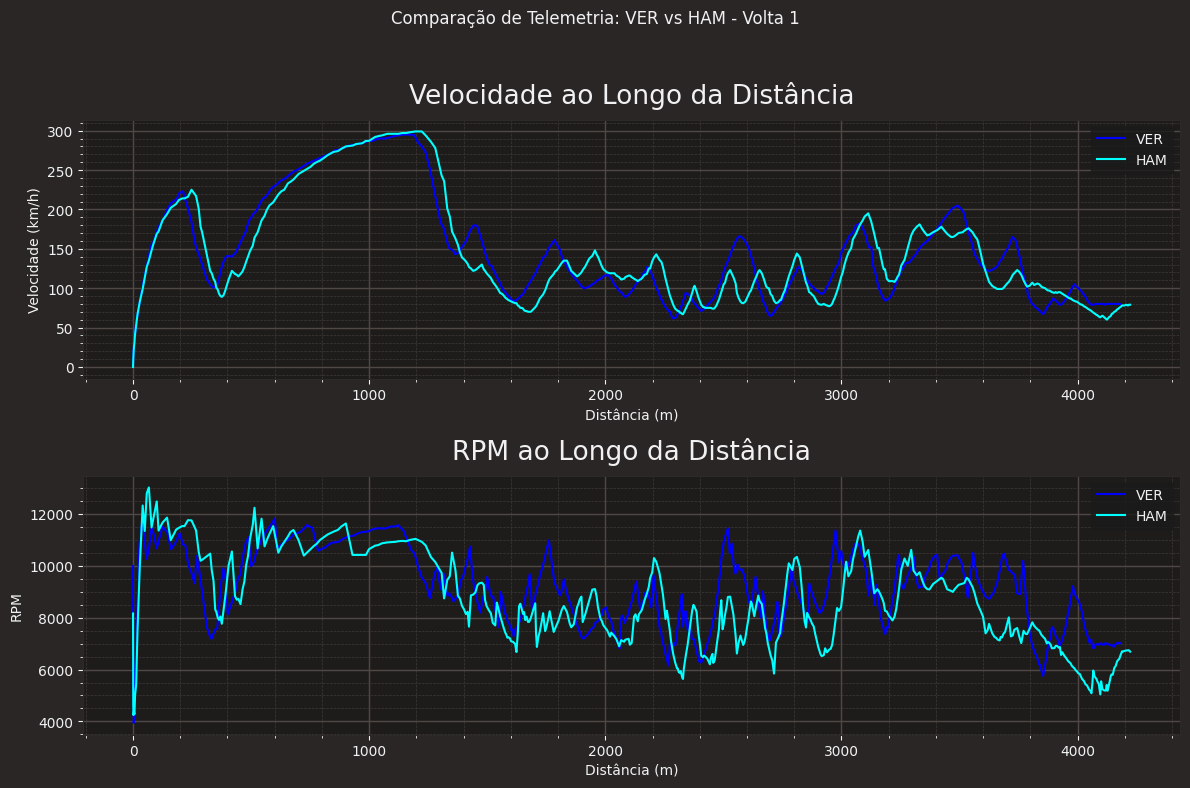

In [48]:
# [7] Plotagem
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle(f"Comparação de Telemetria: {driver1} vs {driver2} - Volta {lap_num}")

# Gráfico 1: Velocidade
ax1.plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label=f'{driver1}', color='blue')
ax1.plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label=f'{driver2}', color='cyan')
ax1.set_title("Velocidade ao Longo da Distância")
ax1.set_xlabel("Distância (m)")
ax1.set_ylabel("Velocidade (km/h)")
ax1.legend()
ax1.grid(True)

# Gráfico 2: RPM
ax2.plot(telemetry_ver['Distance'], telemetry_ver['RPM'], label=f'{driver1}', color='blue')
ax2.plot(telemetry_ham['Distance'], telemetry_ham['RPM'], label=f'{driver2}', color='cyan')
ax2.set_title("RPM ao Longo da Distância")
ax2.set_xlabel("Distância (m)")
ax2.set_ylabel("RPM")
ax2.legend()
ax2.grid(True)

# Ajustar layout e exibir
plt.savefig("telemetry_ham_ver.png")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta o layout para o título não sobrepor os gráficos
plt.show()